In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew, kurtosis, t, chi2_contingency

In [2]:
df=pd.read_csv('yellow_tripdata_sample.csv')
df.to_parquet('yellow_tripdata_2021-01.parquet')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               995 non-null    int64  
 1   tpep_pickup_datetime   995 non-null    object 
 2   tpep_dropoff_datetime  995 non-null    object 
 3   passenger_count        995 non-null    float64
 4   trip_distance          995 non-null    float64
 5   RatecodeID             995 non-null    float64
 6   store_and_fwd_flag     995 non-null    object 
 7   PULocationID           995 non-null    int64  
 8   DOLocationID           995 non-null    int64  
 9   payment_type           995 non-null    int64  
 10  fare_amount            995 non-null    float64
 11  extra                  995 non-null    float64
 12  mta_tax                995 non-null    float64
 13  tip_amount             995 non-null    float64
 14  tolls_amount           995 non-null    float64
 15  improv

In [4]:
df.isnull().sum()

,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,0
trip_distance,0
RatecodeID,0
store_and_fwd_flag,0
PULocationID,0
DOLocationID,0
payment_type,0


In [5]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,1,2024-01-01 00:30:34,2024-01-01 00:51:34,2.0,4.40,1.0,N,234,263,1,22.6,3.5,0.5,2.00,0.0,1.0,29.60,2.5,0.0
991,2,2024-01-01 00:17:21,2024-01-01 00:38:00,1.0,2.46,1.0,N,142,262,1,19.1,1.0,0.5,2.41,0.0,1.0,26.51,2.5,0.0
992,2,2024-01-01 00:44:48,2024-01-01 01:12:54,5.0,2.71,1.0,N,140,48,1,24.7,1.0,0.5,2.00,0.0,1.0,31.70,2.5,0.0
993,1,2024-01-01 00:29:46,2024-01-01 00:38:04,1.0,0.60,1.0,N,249,114,1,8.6,3.5,0.5,2.70,0.0,1.0,16.30,2.5,0.0


In [6]:
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000
mean,1.703518,1.581910,2.890472,1.138693,165.323618,163.204020,1.228141,18.278593,1.741457,0.491960,3.483146,0.197357,0.988945,26.847538,2.326633,0.052764
std,0.456936,0.911625,3.125268,3.126260,67.808656,73.059288,0.486448,14.916422,1.255742,0.077276,4.195507,1.180907,0.144929,18.092018,0.673846,0.309523
min,1.000000,0.000000,0.000000,1.000000,4.000000,4.000000,1.000000,-47.800000,-1.000000,-0.500000,0.000000,0.000000,-1.000000,-52.800000,-2.500000,-1.750000
25%,1.000000,1.000000,1.125000,1.000000,114.000000,107.000000,1.000000,9.300000,1.000000,0.500000,0.000000,0.000000,1.000000,16.320000,2.500000,0.000000
50%,2.000000,1.000000,1.960000,1.000000,161.000000,162.000000,1.000000,14.200000,1.000000,0.500000,3.000000,0.000000,1.000000,22.200000,2.500000,0.000000
75%,2.000000,2.000000,3.400000,1.000000,236.000000,236.000000,1.000000,22.600000,3.500000,0.500000,4.820000,0.000000,1.000000,31.770000,2.500000,0.000000
max,2.000000,6.000000,23.900000,99.000000,265.000000,265.000000,4.000000,180.000000,7.750000,0.500000,80.000000,12.750000,1.000000,217.200000,2.500000,1.750000


In [ ]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.strip()

numeric_cols = df.select_dtypes(include=['number']).columns
for col in numeric_cols:
    skew_val = df[col].skew()
    kurt_val = df[col].kurt()
    print(f"Column: {col}")
    print(f"  Skewness: {skew_val}")
    print(f"  Kurtosis: {kurt_val}")
    print("-" * 30)

Column: VendorID
  Skewness: -0.8925868396600161
  Kurtosis: -1.2057163333603138
------------------------------
Column: passenger_count
  Skewness: 1.6643298072083297
  Kurtosis: 2.827890429140433
------------------------------
Column: trip_distance
  Skewness: 3.2881722319456728
  Kurtosis: 13.975566356327981
------------------------------
Column: RatecodeID
  Skewness: 30.93458019652465
  Kurtosis: 968.8124464187661
------------------------------
Column: PULocationID
  Skewness: -0.21890662893587856
  Kurtosis: -1.0652627964704677
------------------------------
Column: DOLocationID
  Skewness: -0.2905821650744038
  Kurtosis: -1.0991061885432483
------------------------------
Column: payment_type
  Skewness: 2.5764480427548953
  Kurtosis: 8.963616358625803
------------------------------
Column: fare_amount
  Skewness: 3.0124402462143554
  Kurtosis: 20.739872581623793
------------------------------
Column: extra
  Skewness: 1.1496210281653165
  Kurtosis: 0.7179873692663397
------------

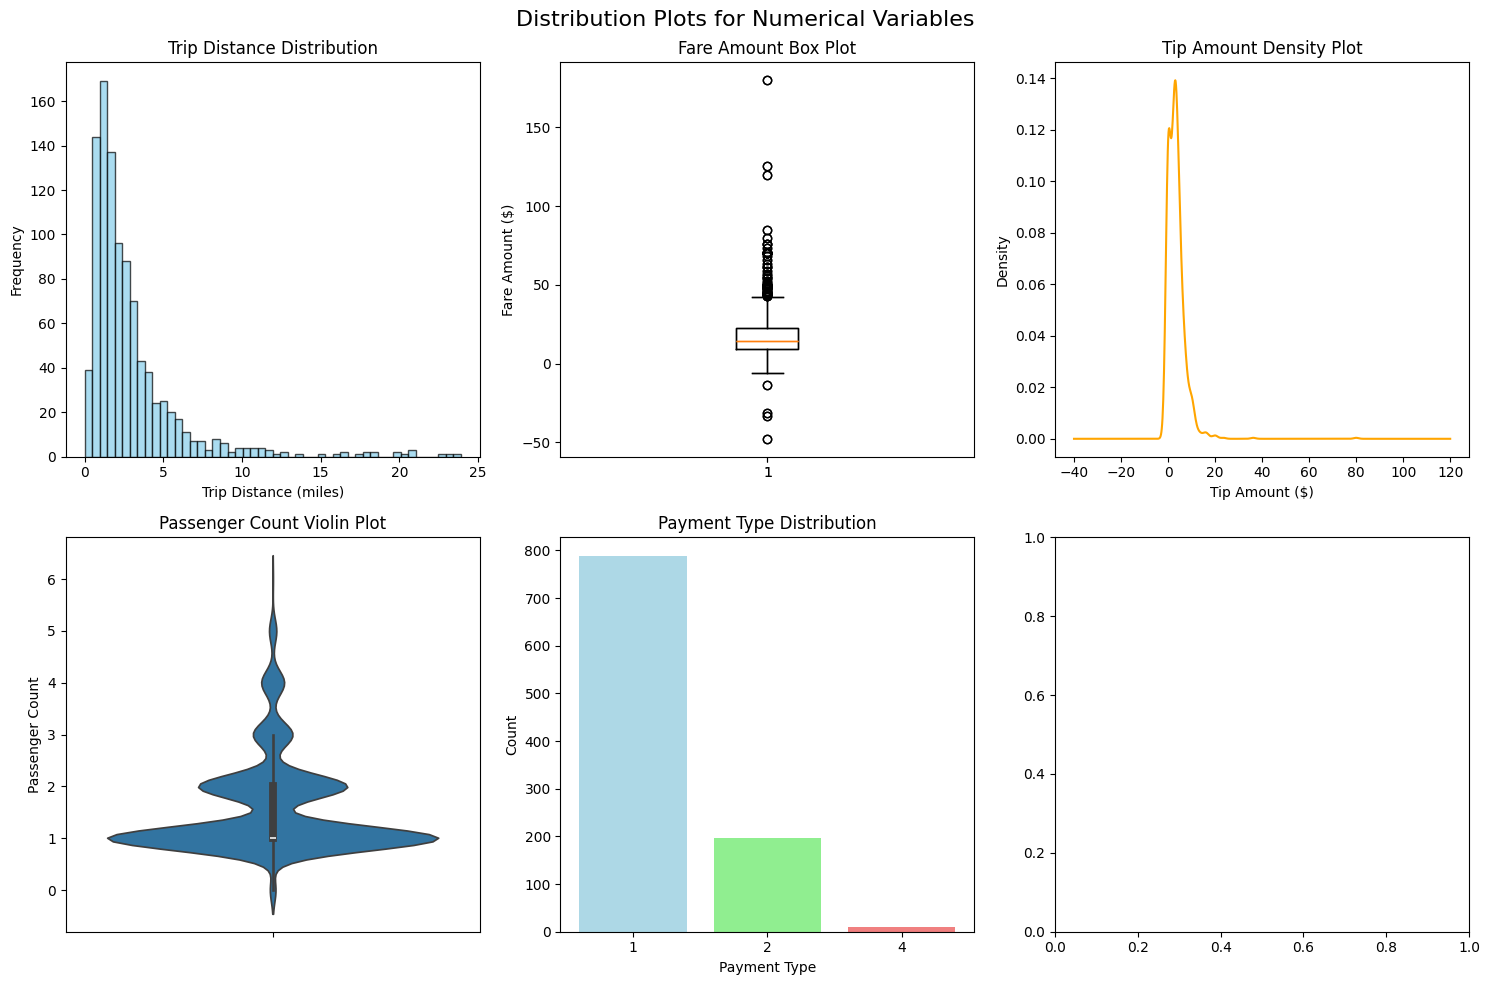

In [11]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distribution Plots for Numerical Variables', fontsize=16)

axes[0,0].hist(df['trip_distance'].dropna(), bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Trip Distance Distribution')
axes[0,0].set_xlabel('Trip Distance (miles)')
axes[0,0].set_ylabel('Frequency')

axes[0,1].boxplot(df['fare_amount'].dropna())
axes[0,1].set_title('Fare Amount Box Plot')
axes[0,1].set_ylabel('Fare Amount ($)')

axes[0,1].boxplot(df['fare_amount'].dropna())
axes[0,1].set_title('Fare Amount Box Plot')
axes[0,1].set_ylabel('Fare Amount ($)')

df['tip_amount'].dropna().plot(kind='density', ax=axes[0,2], color='orange')
axes[0,2].set_title('Tip Amount Density Plot')
axes[0,2].set_xlabel('Tip Amount ($)')

sns.violinplot(y=df['passenger_count'].dropna(), ax=axes[1,0])
axes[1,0].set_title('Passenger Count Violin Plot')
axes[1,0].set_ylabel('Passenger Count')


if 'payment_type' in df.columns:
    payment_counts = df['payment_type'].value_counts()
    axes[1,1].bar(payment_counts.index.astype(str), payment_counts.values, color=['lightblue', 'lightgreen', 'lightcoral'])
    axes[1,1].set_title('Payment Type Distribution')
    axes[1,1].set_xlabel('Payment Type')
    axes[1,1].set_ylabel('Count')

if 'vendor_id' in df.columns:
    vendor_counts = df['vendor_id'].value_counts()
    axes[1,2].pie(vendor_counts.values, labels=vendor_counts.index.astype(str), autopct='%1.1f%%')
    axes[1,2].set_title('Vendor ID Distribution')

plt.tight_layout()
plt.show()

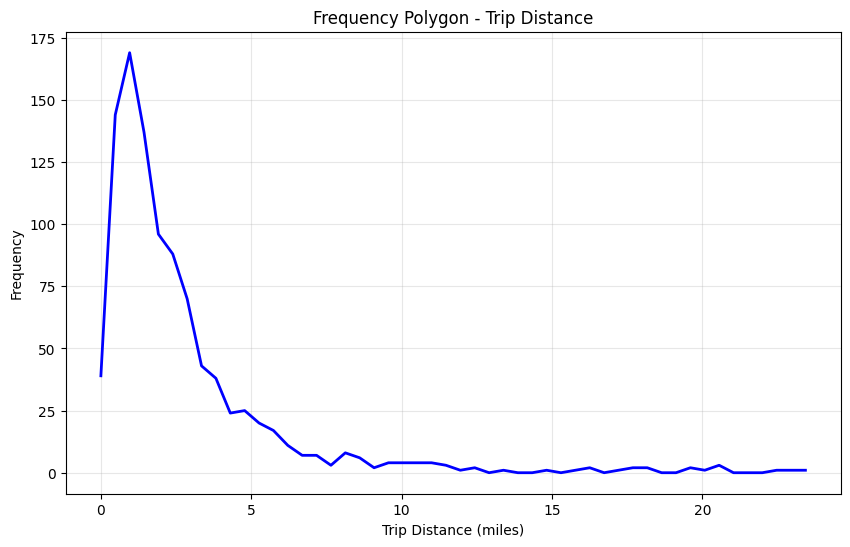

In [12]:
plt.figure(figsize=(10, 6))
counts, bin_edges = np.histogram(df['trip_distance'].dropna(), bins=50)
plt.plot(bin_edges[:-1], counts, 'b-', linewidth=2)
plt.title('Frequency Polygon - Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

In [13]:
def confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    std_err = stats.sem(data)
    h = std_err * stats.t.ppf((1 + confidence) / 2, n - 1)
    return mean, mean - h, mean + h

print("\n95% Confidence Intervals:")
for col in ['trip_distance', 'fare_amount', 'tip_amount']:
    if col in df.columns:
        data = df[col].dropna()
        mean, lower, upper = confidence_interval(data)
        print(f"{col}: Mean = {mean:.2f}, CI = ({lower:.2f}, {upper:.2f})")


95% Confidence Intervals:
trip_distance: Mean = 2.89, CI = (2.70, 3.08)
fare_amount: Mean = 18.28, CI = (17.35, 19.21)
tip_amount: Mean = 3.48, CI = (3.22, 3.74)


In [17]:
tip_data = df['tip_amount'].dropna()
t_stat, p_value = stats.ttest_1samp(tip_data, 2)
print(f"One-sample t-test for tip amount = $2:")
print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject H0: Average tip amount is significantly different from $2")
else:
    print("Fail to reject H0: No significant evidence that average tip amount differs from $2")

if 'payment_type' in df.columns and 'fare_amount' in df.columns:
    credit_card_fares = df[df['payment_type'] == 1]['fare_amount'].dropna()
    cash_fares = df[df['payment_type'] == 2]['fare_amount'].dropna()

    if len(credit_card_fares) > 0 and len(cash_fares) > 0:
        t_stat, p_value = stats.ttest_ind(credit_card_fares, cash_fares, equal_var=False)
        print(f"\nTwo-sample t-test (Credit Card vs Cash fares):")
        print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.4f}")
        print(f"Mean fare (Credit Card): ${credit_card_fares.mean():.2f}")
        print(f"Mean fare (Cash): ${cash_fares.mean():.2f}")
        if p_value < 0.05:
            print("Reject H0: Significant difference in fare amounts between payment types")
        else:
            print("Fail to reject H0: No significant difference in fare amounts")

if 'payment_type' in df.columns and 'rate_code_id' in df.columns:
    contingency_table = pd.crosstab(df['payment_type'], df['rate_code_id'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    print(f"\nChi-square test for Payment_type and RateCodeID:")
    print(f"Chi2 statistic: {chi2:.3f}, P-value: {p_value:.4f}, Degrees of freedom: {dof}")
    if p_value < 0.05:
        print("Reject H0: Payment_type and RateCodeID are not independent")
    else:
        print("Fail to reject H0: No evidence against independence")

One-sample t-test for tip amount = $2:
T-statistic: 11.151, P-value: 0.0000
Reject H0: Average tip amount is significantly different from $2

Two-sample t-test (Credit Card vs Cash fares):
T-statistic: 0.247, P-value: 0.8049
Mean fare (Credit Card): $18.47
Mean fare (Cash): $18.16
Fail to reject H0: No significant difference in fare amounts


Pearson Correlation Matrix:
                 trip_distance  fare_amount  tip_amount  total_amount  \
trip_distance            1.000        0.802       0.432         0.799   
fare_amount              0.802        1.000       0.493         0.975   
tip_amount               0.432        0.493       1.000         0.663   
total_amount             0.799        0.975       0.663         1.000   
passenger_count         -0.063       -0.023      -0.023        -0.024   

                 passenger_count  
trip_distance             -0.063  
fare_amount               -0.023  
tip_amount                -0.023  
total_amount              -0.024  
passenger_count            1.000  

Trip_distance vs Fare_amount: r = 0.802
Fare_amount vs Tip_amount: r = 0.493


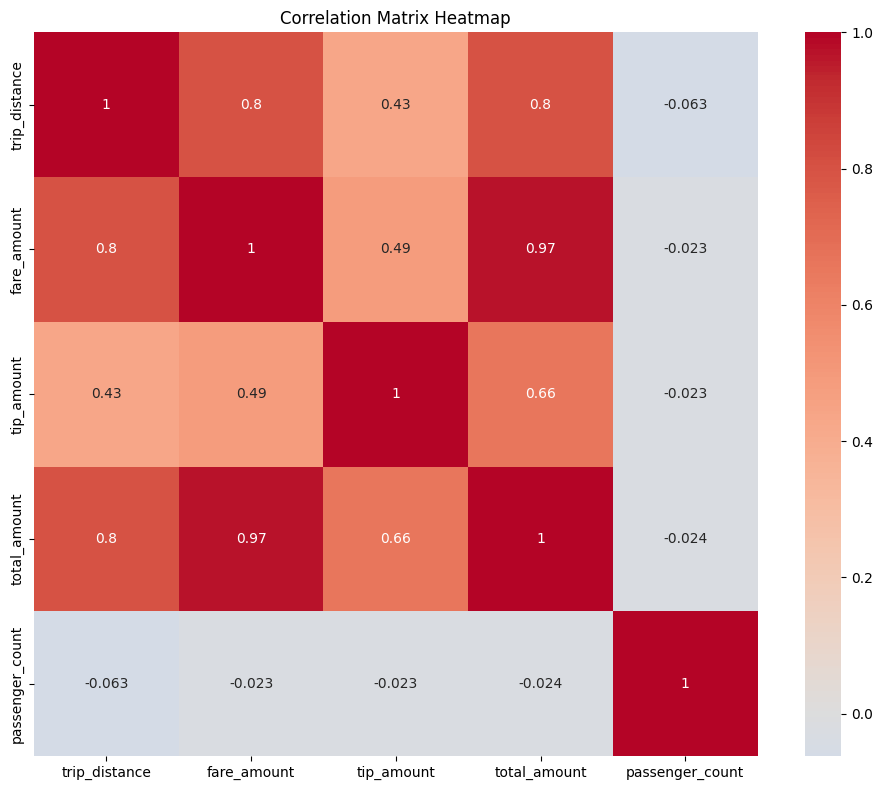

In [18]:
corr_columns = ['trip_distance', 'fare_amount', 'tip_amount', 'total_amount', 'passenger_count']
corr_df = df[corr_columns].dropna()

pearson_corr = corr_df.corr(method='pearson')
print("Pearson Correlation Matrix:")
print(pearson_corr.round(3))

print(f"\nTrip_distance vs Fare_amount: r = {pearson_corr.loc['trip_distance', 'fare_amount']:.3f}")
print(f"Fare_amount vs Tip_amount: r = {pearson_corr.loc['fare_amount', 'tip_amount']:.3f}")


plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

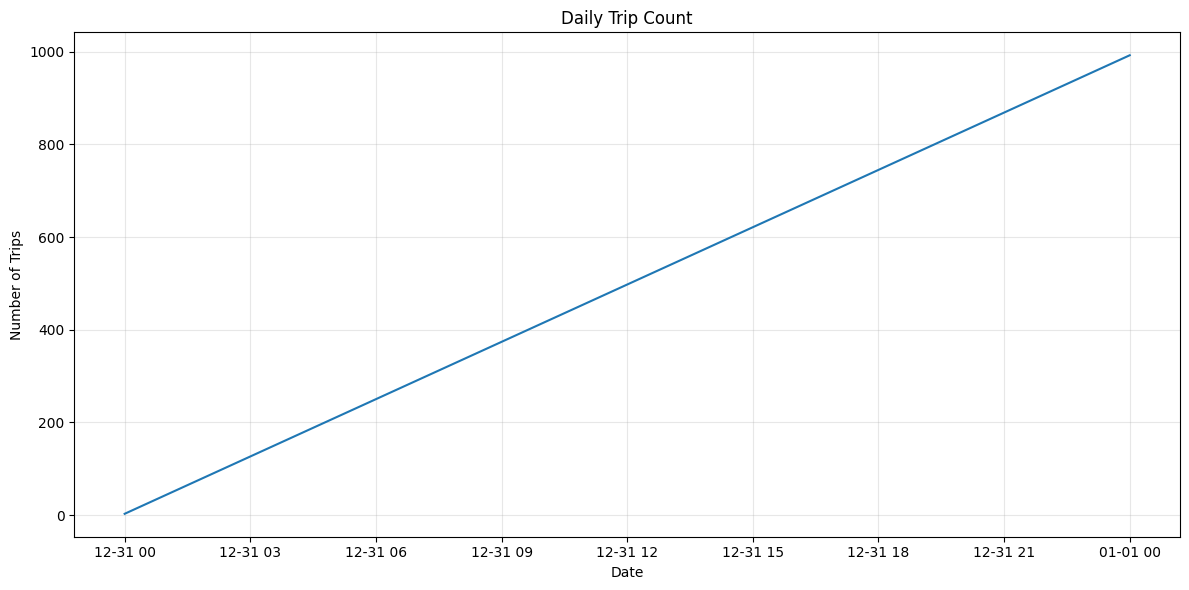

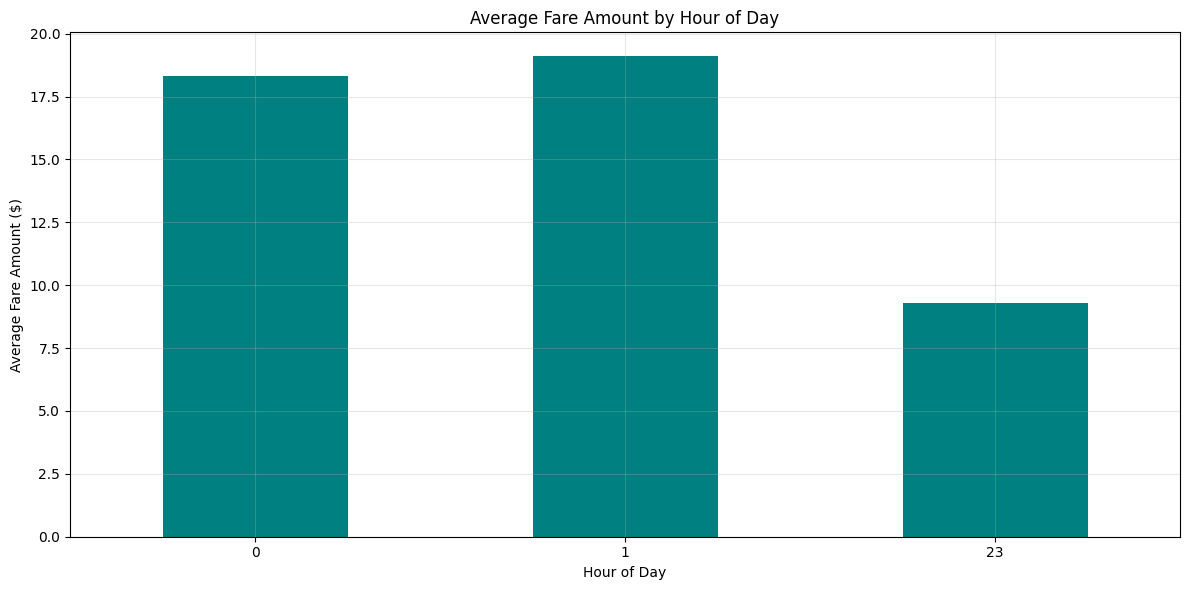

In [20]:

if 'tpep_pickup_datetime' in df.columns:
    if df['tpep_pickup_datetime'].dtype != 'datetime64[ns]':
        df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')

    df['pickup_date'] = df['tpep_pickup_datetime'].dt.date
    df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

    daily_trips = df.groupby('pickup_date').size()

    plt.figure(figsize=(12, 6))
    daily_trips.plot()
    plt.title('Daily Trip Count')
    plt.xlabel('Date')
    plt.ylabel('Number of Trips')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    hourly_fare = df.groupby('pickup_hour')['fare_amount'].mean()

    plt.figure(figsize=(12, 6))
    hourly_fare.plot(kind='bar', color='teal')
    plt.title('Average Fare Amount by Hour of Day')
    plt.xlabel('Hour of Day')
    plt.ylabel('Average Fare Amount ($)')
    plt.xticks(rotation=0)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()